In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("Dataset.csv")

In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (5000, 33)


In [ ]:
data.isnull().any().any()

True

In [ ]:
null_cols = [i for i in data.columns if data[i].isnull().any()]
print(null_cols)

['company_name', 'ein', 'industry_description', 'establishment_type', 'change_reason', 'delete']


In [ ]:
cols_drop = ['company_name', 'ein', 'industry_description', 'establishment_type', 'change_reason', 'delete']
data = data.drop(cols_drop, axis=1)

In [ ]:
data = data.dropna()
data

,id,establishment_name,street_address,city,state,zip_code,naics_code,annual_average_employees,total_hours_worked,no_injuries_illnesses,...,total_poisonings,total_respiratory_conditions,total_skin_disorders,total_hearing_loss,total_other_illnesses,establishment_id,size,year_filing_for,created_timestamp,source
0,4,McKamish Inc.,50 55th Street,Pittsburgh,PA,15201,238220,280,579688,1,...,0,0,0,0,0,41920,3,2016,8/1/2017 6:12,ITA Data CY 2016.csv
1,5,The Hinckley Company,40 Industrial Way,Trenton,ME,4605,336612,246,501578,1,...,0,0,0,0,0,41922,3,2016,8/1/2017 6:23,ITA Data CY 2016.csv
2,6,Williamsburg Manufacturing,408 Maplewood Ave,Williamsburg,IA,52361,336370,273,619945,1,...,0,0,0,0,0,41923,3,2016,8/1/2017 6:27,ITA Data CY 2016.csv
3,7,Morris Yachts LLC,27 Ramp Road,Trenton,ME,4605,336612,33,75794,1,...,0,0,0,0,0,41925,2,2016,8/1/2017 6:36,ITA Data CY 2016.csv
4,8,Hunt Yachts LLC,1909 Alden Landing,Portsmouth,RI,2871,336612,43,114734,1,...,0,0,0,0,0,41926,2,2016,8/1/2017 6:35,ITA Data CY 2016.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5004,Owen Building,225 N Adams,Coquille,OR,97423,925120,5,10400,2,...,0,0,0,0,0,48302,3,2016,8/11/2017 11:56,ITA Data CY 2016.csv
4996,5005,Parks/Forestry,1309 W Central,Coquille,OR,97423,924120,13,27040,1,...,0,0,0,2,0,48303,3,2016,8/11/2017 11:58,ITA Data CY 2016.csv
4997,5006,Food Bank of South Central Michigan,5451 Wayne Rd.,Battle Creek,MI,49037,624210,26,34006,1,...,0,0,0,0,0,48301,2,2016,8/11/2017 12:02,ITA Data CY 2016.csv
4998,5007,Londonderry Freezer Warehouse,219 Rockingham Road,Londonderry,NH,3353,493120,22,44888,1,...,0,0,0,0,0,47935,2,2016,8/11/2017 12:05,ITA Data CY 2016.csv


In [ ]:
x = data.loc[:, ['total_deaths',
                 'total_injuries']].values

In [ ]:
print(x.shape)

(5000, 2)


In [ ]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2)
nbrs=neighb.fit(x)
distances,indices=nbrs.kneighbors(x)

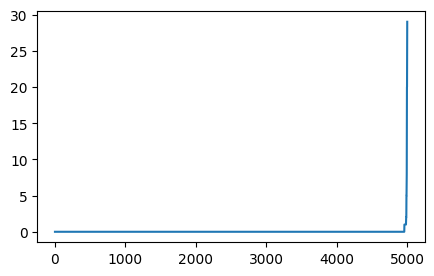

In [ ]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 1, min_samples = 4).fit(x)
labels = dbscan.labels_

In [ ]:
unique_values, counts = np.unique(labels, return_counts= True)
print("Tập nhãn cụm đã xuất hiện:", unique_values)
print("Số lượng các nhãn cụm đã xuất hiện:", counts)

Tập nhãn cụm đã xuất hiện: [-1  0  1  2  3  4]
Số lượng các nhãn cụm đã xuất hiện: [  34 4935    4    6   12    9]


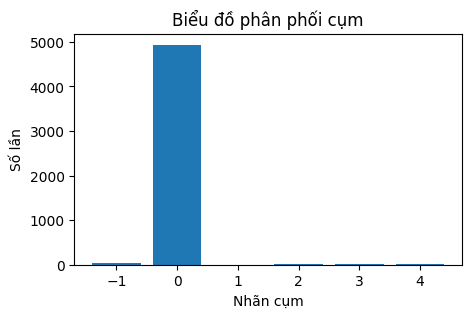

In [ ]:
unique_values, counts = np.unique(labels, return_counts= True)
plt.bar(unique_values, counts)
plt.xlabel('Nhãn cụm')
plt.ylabel('Số lần')
plt.title('Biểu đồ phân phối cụm')
plt.show()

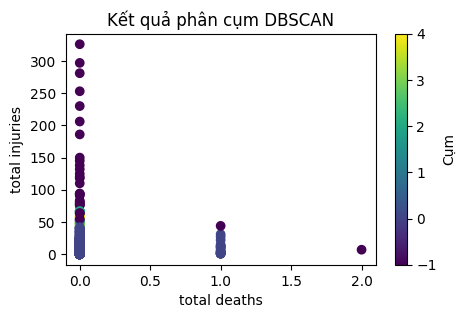

In [ ]:
plt.scatter(data['total_deaths'], data['total_injuries'], c = labels)
plt.ylabel('total injuries')
plt.xlabel('total deaths')
plt.title("Kết quả phân cụm DBSCAN")
plt.colorbar(label='Cụm')
plt.show()

In [ ]:
x = [5, 10, 15, 20, 25, 30, 35, 40]
y = [10, 20, 30, 40, 50, 60, 70, 80]


In [ ]:
data = pd.DataFrame({'Total Deaths': x, 'Total Injuries': y})

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [ ]:
dbscan = DBSCAN(eps=1, min_samples=4)
clusters = dbscan.fit_predict(scaled_data)

In [ ]:
data['Cluster'] = clusters

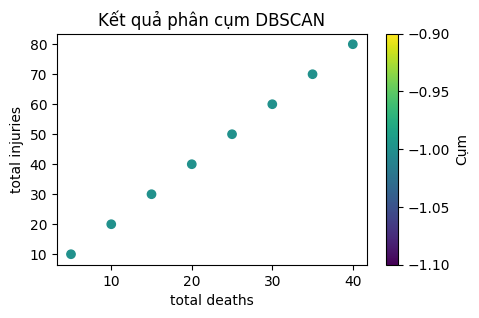

In [ ]:
plt.scatter(data['Total Deaths'], data['Total Injuries'], c = clusters)
plt.ylabel('total injuries')
plt.xlabel('total deaths')
plt.title("Kết quả phân cụm DBSCAN")
plt.colorbar(label='Cụm')
plt.show()